# -------------------- Wine Quality Prediction -------------------------

In [1]:
#All imports here 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import pickle
import warnings

#ignoring all warnings
warnings.filterwarnings('ignore') 

## Loading the dataset

In [2]:
df = pd.read_csv(r'winequality-red.csv')

df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

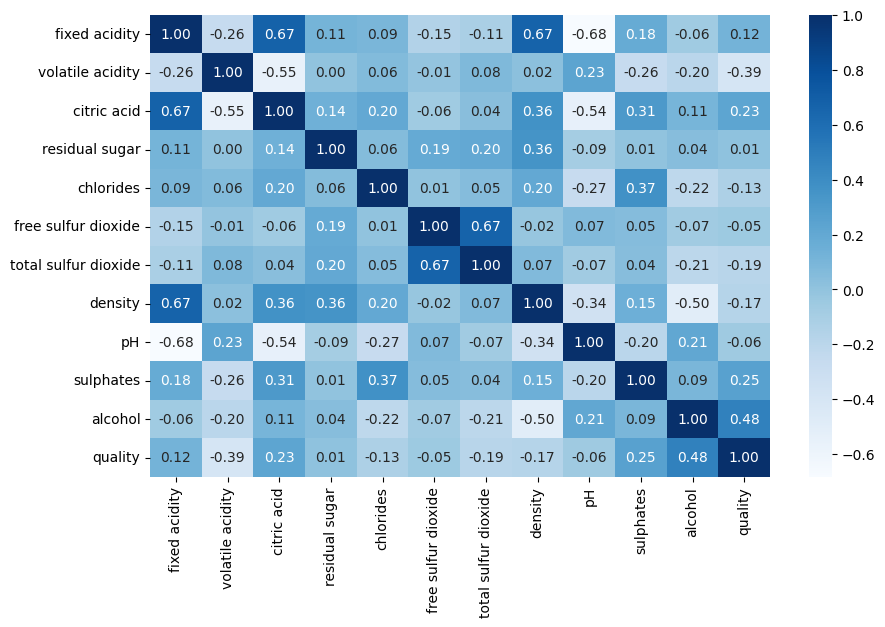

In [6]:
##Getting the correlation among data

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap='Blues')

good correlations------->                           
citric acid & fixed acidity (0.67)                     
density & fixed acidity (0.67)                        
free sulpher dioxide and total sulpher dioxide (0.67)                     
alcohol & quality (0.48)

<Axes: xlabel='quality', ylabel='alcohol'>

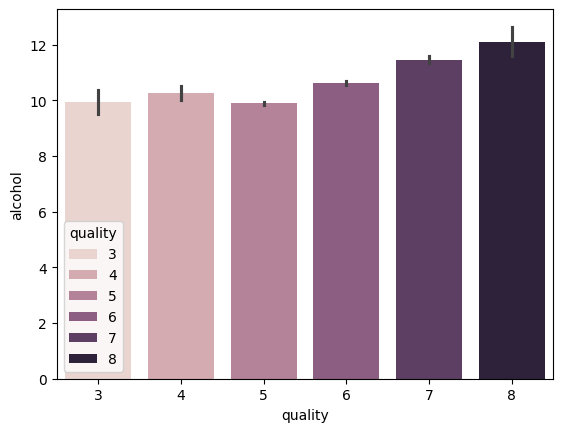

In [7]:
sns.barplot(x=df['quality'], y=df['alcohol'], hue=df['quality'])

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

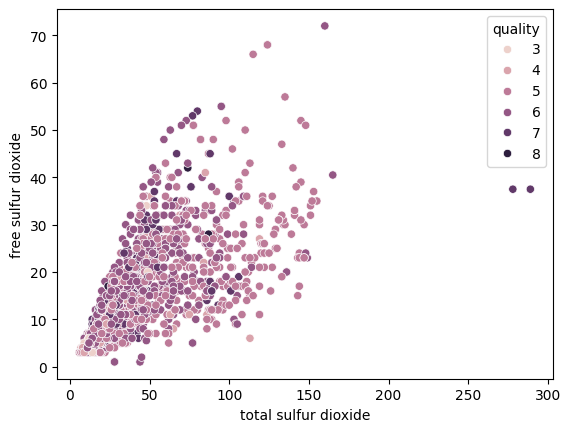

In [9]:
sns.scatterplot(x=df['total sulfur dioxide'] ,y=df['free sulfur dioxide'], hue=df['quality'])

In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [11]:
## simplifying quality indices

for i in range(df['quality'].size):
    if i>5 and i<=7:
        df['quality'].replace(i, 2, inplace=True)
    elif i<5 and i>=4:
        df['quality'].replace(i, 3, inplace=True)
    elif i>7:
        df['quality'].replace(i, 1, inplace=True)
    else:
        df['quality'].replace(i, 4, inplace=True)

In [12]:
df['quality'].value_counts()

quality
2    837
4    681
3     63
1     18
Name: count, dtype: int64

In [13]:
#imports for model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
#seperating target feature

x=df.drop('quality', axis=1)
y=df['quality']

## Data Normalization

In [15]:
scalar = StandardScaler()
X = scalar.fit_transform(x)

## Data Splitting

In [16]:
#splitting train & test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Model Training

In [17]:
#Defining model

model = SVC()

#training the model
model.fit(X_train, y_train)

#predicting values
y_svc=model.predict(X_test)

#evaluating the model
svc_score=model.score(X_test, y_test)
print('Model Score :', svc_score)

Model Score : 0.7166666666666667


In [18]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid']}
svc_cv = GridSearchCV(model, param_grid, cv=5)

# Performing hyperparameter tuning
svc_cv.fit(X_train, y_train)

# Getting best hyperparameters
best_params = svc_cv.best_params_
print("Best hyperparameters:", best_params)

#Rebuilding the model
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

Best hyperparameters: {'C': 1, 'kernel': 'rbf'}


SVC(C=1)

In [19]:
#making predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
best_svc_score = best_model.score(X_test, y_test)
print("Best model score:", best_svc_score)

Best model score: 0.7166666666666667


## Model Evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)*100

precision = precision_score(y_test, y_pred, average='weighted')*100

recall = recall_score(y_test, y_pred, average='weighted')*100

f1 = f1_score(y_test, y_pred, average='weighted')*100

conf_matrix = confusion_matrix(y_test, y_pred)

print("""------------------- \n
Accuracy: {:.2f}% \n
------------------- \n
Precision: {:.2f}% \n
------------------- \n
Recall: {:.2f}% \n
------------------- \n
F1-score: {:.2f}% \n
------------------- \n
Confusion Matrix: \n {}""".format(accuracy, precision, recall, f1, conf_matrix))

------------------- 

Accuracy: 71.67% 

------------------- 

Precision: 68.45% 

------------------- 

Recall: 71.67% 

------------------- 

F1-score: 69.94% 

------------------- 

Confusion Matrix: 
 [[  0   6   0   0]
 [  0 198   0  63]
 [  0   5   0  13]
 [  0  49   0 146]]


## Exporting the model

In [21]:
# Defining the filename
filename = 'Wine_quality_pred.pkl'

# Open the file & save the model
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)
print('\n-----------Model successfully exported-----------')


-----------Model successfully exported-----------
